# New concepts and snippets

The goal of this notebook is to list the new concepts and the new code that I learned from the videos and the notebooks of the course.

## Reproducible Data Analysis in Jupyter

The first source is the playlist on YouTube: [Reproducible Data Analysis in Jupyter](https://www.youtube.com/watch?v=_ZEWDGpM-vM&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&index=2)

### 1. Retrieve the data from the web

In [10]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
import pandas as pd
from urllib.request import urlretrieve

urlretrieve(URL, "Fremont.csv")

df = pd.read_csv("Fremont.csv", index_col='Date', parse_dates=True) # You can also use the URL directly
print(df.head())

C:\Users\User\AppData\Local\Temp\ipykernel_24408\4111986260.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Fremont.csv", index_col='Date', parse_dates=True) # You can also use the URL directly


                     Fremont Bridge Sidewalks, south of N 34th St  \
Date                                                                
2012-10-02 13:00:00                                          55.0   
2012-10-02 14:00:00                                         130.0   
2012-10-02 15:00:00                                         152.0   
2012-10-02 16:00:00                                         278.0   
2012-10-02 17:00:00                                         563.0   

                     Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  \
Date                                                                                      
2012-10-02 13:00:00                                                7.0                    
2012-10-02 14:00:00                                               55.0                    
2012-10-02 15:00:00                                               81.0                    
2012-10-02 16:00:00                                          

C:\Users\User\AppData\Local\Temp\ipykernel_24408\3192913905.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sum().plot() # New granularity level


<Axes: xlabel='Date'>

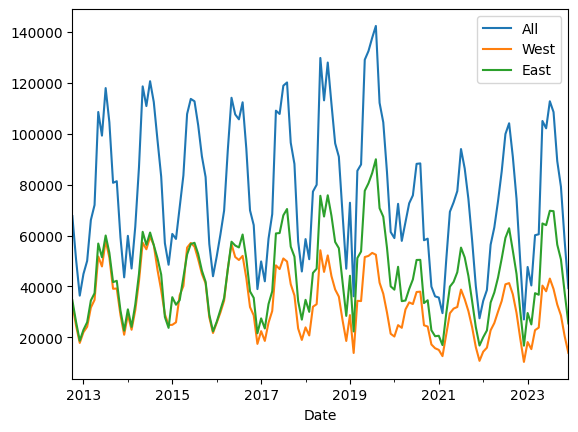

In [20]:
import matplotlib.pyplot as plt

df.columns = ['All','West', 'East']
df.resample('M').sum().plot() # New granularity level

(0.0, 1256022.05)

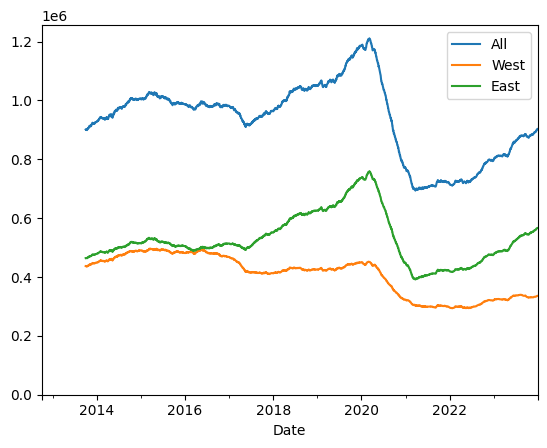

In [22]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)


<Axes: xlabel='time'>

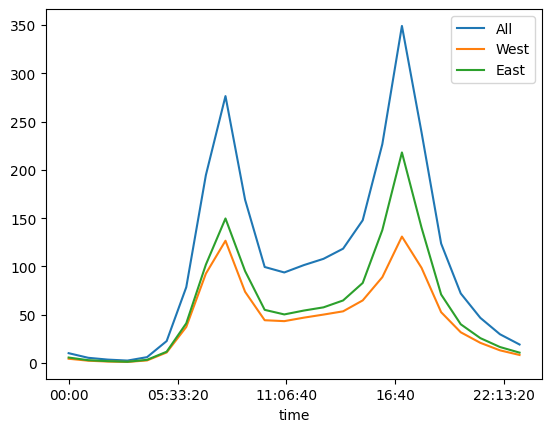

In [23]:
df.groupby(df.index.time).mean().plot() 

In [25]:
pivoted = df.pivot_table('All', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

2012-10-02  2012-10-03  2012-10-04  2012-10-05  2012-10-06
00:00:00         NaN        13.0        18.0        11.0        15.0
01:00:00         NaN        10.0         3.0         8.0        15.0
02:00:00         NaN         2.0         9.0         7.0         9.0
03:00:00         NaN         5.0         3.0         4.0         3.0
04:00:00         NaN         7.0         8.0         9.0         5.0